In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Downloading the data from Spotify Top 50 Tracks of 2020 dataset using Pandas:

In [14]:
df = pd.read_csv('spotifytoptracks.csv')
df.head(5)

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [15]:
df = df.rename(columns={'Unnamed: 0': 'track_number'})
df.head(1)

,track_number,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.73,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul


### Handling missing values:

In [16]:
df.isnull().sum()

track_number        0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

If there were any missing values, we would eliminate them with dropna method:

In [17]:
df.dropna(inplace=True) 

### Removing duplicate samples and features:

In [18]:
duplicates = df[df.duplicated()]
duplicates

,track_number,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre


If there were any duplicates, deletion of it would be done with drop_duplicates method:

In [19]:
df.drop_duplicates(inplace=True)

### Treating the outliers:

In [20]:
numeric_columns = df.select_dtypes(include=[np.number])
print("Numeric columns:", numeric_columns.columns)

Numeric columns: Index(['track_number', 'energy', 'danceability', 'key', 'loudness',
       'acousticness', 'speechiness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')


Creating boxplots for every numeric column:

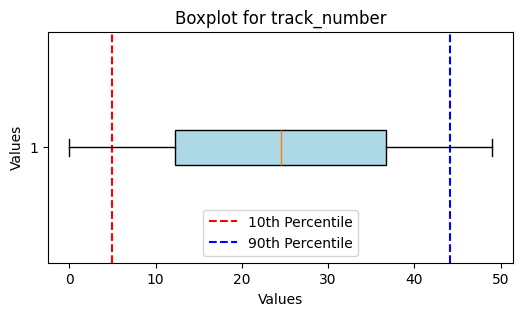

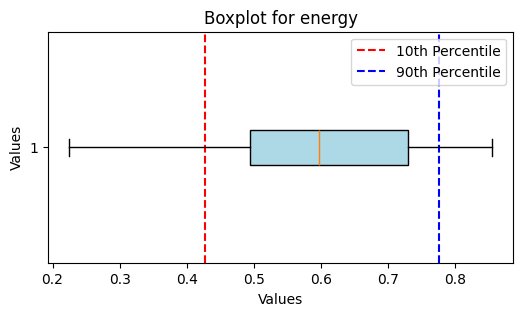

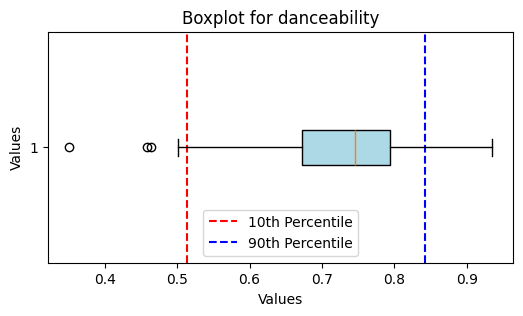

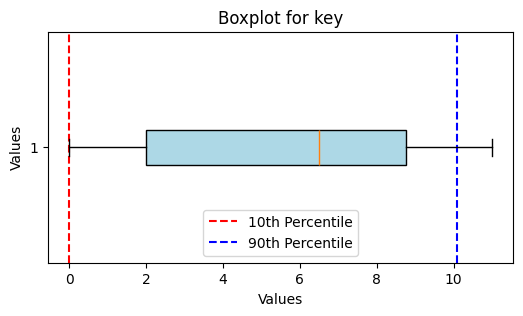

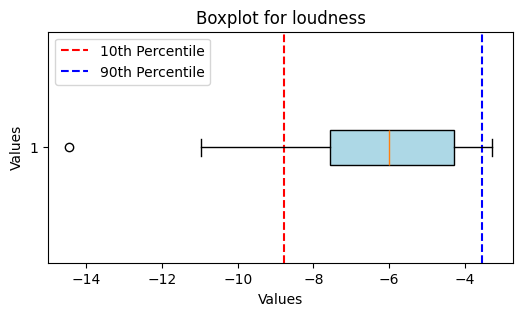

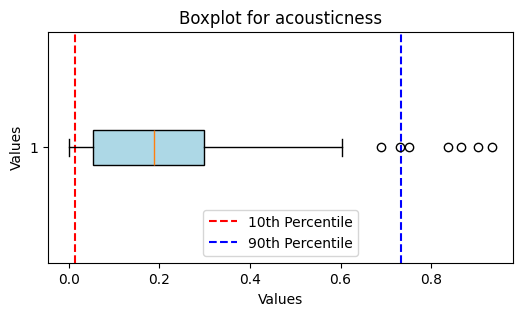

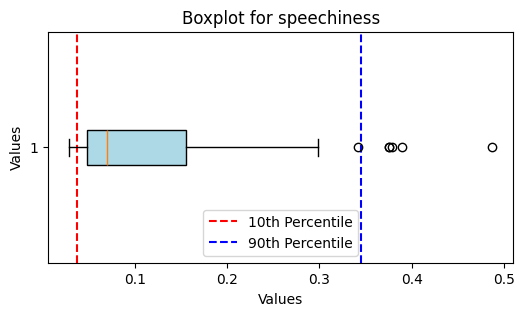

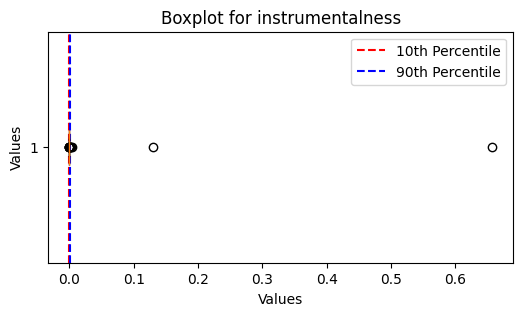

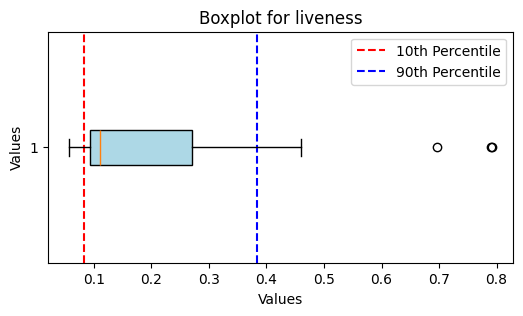

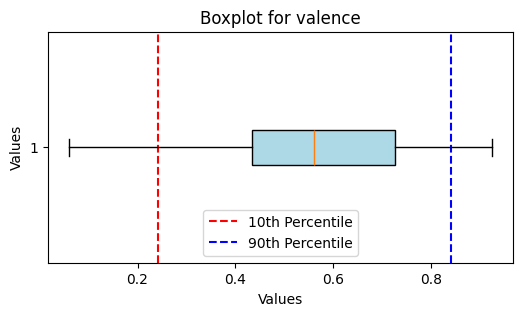

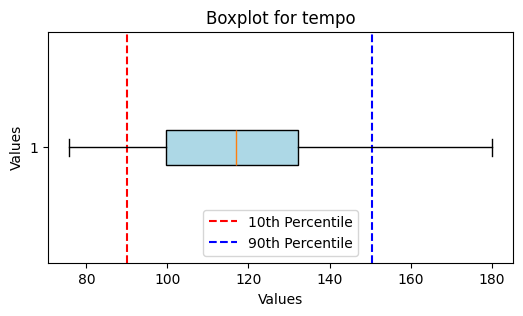

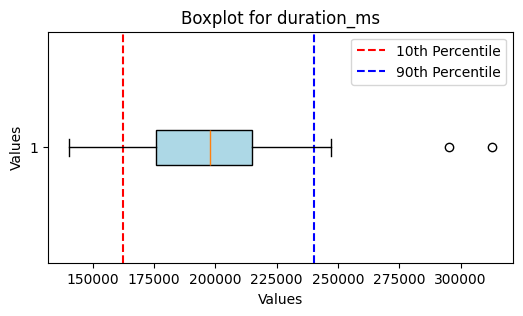

In [21]:
for column in numeric_columns.columns:
    'Create a new figure and axis'
    fig, ax = plt.subplots(figsize=(6, 3))
    
    'Set the title and labels'
    ax.set_title(f"Boxplot for {column}")
    ax.set_ylabel("Values")

    'Calculate and mark the 10th percentile'
    quantile_10 = np.percentile(numeric_columns[column], 10)
    ax.axvline(quantile_10, color='red', linestyle='--', label='10th Percentile')

    'Calculate and mark the 90th percentile'
    quantile_90 = np.percentile(numeric_columns[column], 90)
    ax.axvline(quantile_90, color='blue', linestyle='--', label='90th Percentile')
    
    'Create the boxplot'
    boxplot = ax.boxplot(numeric_columns[column], vert=False, patch_artist=True)
    
    'Add color to the boxplots'
    for patch in boxplot['boxes']:
        patch.set_facecolor('lightblue')

    'Add labels and legend'
    ax.set_xlabel('Values')
    ax.legend()

    'Show the boxplot'
    plt.show()

Overall, I think that knowing that SpotifyTopTracks file is filled with limited amount of records and values are not extremely high/low, I would leave all data there for analysis. However, I wanted to test the Z-score method for this task:

Z-score method for outlier treatment according to https://datasciencestunt.com/python-snippets-for-outliers-treatment/

In [22]:
z_scores = (numeric_columns['duration_ms'] - np.mean(numeric_columns['duration_ms'] )) / np.std(numeric_columns['duration_ms'] )
z_score_threshold = 3
outliers = np.abs(z_scores) > z_score_threshold
print(outliers)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
Name: duration_ms, dtype: bool


In [23]:
numeric_columns

,track_number,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040
1,1,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755
2,2,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653
3,3,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219
4,4,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290
5,5,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733
6,6,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000
7,7,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333
8,8,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382
9,9,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161


In [24]:
for column in numeric_columns.columns:
    z_scores = (numeric_columns[column] - numeric_columns[column].mean()) / numeric_columns[column].std()

    for idx, z_score in enumerate(z_scores):
        if np.abs(z_score) > z_score_threshold:
            print(f"Outlier in row {idx} for column {column}")

Outlier in row 24 for column loudness
Outlier in row 19 for column speechiness
Outlier in row 24 for column instrumentalness
Outlier in row 2 for column liveness
Outlier in row 41 for column liveness
Outlier in row 49 for column duration_ms


### Analysis on outliers and explanation why values won't be adjusted or removed:

There are four columns with outliers:
1. loudness
2. speechiness
3. instrumentalness
4. liveness
5. duration_ms

There are three columns that hold values between 0 and 1:

1. In Spotify's audio analysis, "speechiness" is quantified as a value between 0 and 1, where:
+ A low value (close to 0) suggests that the song is primarily instrumental or contains little to no spoken words. It is more instrumental or music-focused.
+ A high value (close to 1) indicates that the song contains a significant amount of spoken words, such as dialogue, rap lyrics, or vocal elements with a strong speech-like quality.

2. In Spotify's audio analysis, "instrumentalness" is quantified as a value between 0 and 1, where:
+ A high value (close to 1) indicates that the song is predominantly instrumental, meaning it contains little to no vocal or lyrical content.
+ A low value (close to 0) suggests that the song contains a significant amount of vocal content, and it may be primarily a vocal or lyrical composition.

3. In Spotify's audio analysis, "liveness" is quantified as a value between 0 and 1, where:
+ A high value (close to 1) indicates that the track has a strong presence of a live audience or live performance characteristics.
+ A low value (close to 0) suggests that the track was likely recorded in a studio and lacks the characteristics of a live performance.

When the range of values in a dataset is limited and falls within a specific, expected range, there may not be a need to adjust or delete values that are within that range. 

The attributes "duration_ms" and "loudness" represent essential characteristics of a track, and given that they fall within the expected range for such attributes, there is no need to modify or remove them.